# Using the `antarctic_plots.regions` module

## Display all the pre=defined regions

In [1]:
%load_ext autoreload
%autoreload 2
from antarctic_plots import maps, regions, fetch
from statistics import mean

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


Add all region strings to dictionary

In [2]:
def exclude(k): return k.startswith("__")
# exclude = lambda k: k.startswith("__")
region_dict = {k: v for k, v in vars(regions).items() if not exclude(k)}
region_dict
# region_list = [item for item in dir(regions) if not item.startswith("__")]
# region_list

{'antarctica': [-2800000.0, 2800000.0, -2800000.0, 2800000.0],
 'west_antarctica': [-2740000.0, 570000.0, -2150000.0, 1670000.0],
 'east_antarctica': [-840000.0, 2880000.0, -2400000.0, 2600000.0],
 'antarctic_peninsula': [-2600000.0, -1200000.0, 170000.0, 1800000.0],
 'marie_byrd_land': [-1500000.0, -500000.0, -1350000.0, -800000.0],
 'victoria_land': [100000.0, 1000000.0, -2200000.0, -1000000.0],
 'roosevelt_island': [-480000.0, -240000.0, -1220000.0, -980000.0],
 'ross_island': [210000.0, 360000.0, -1400000.0, -1250000.0],
 'minna_bluff': [210000.0, 390000.0, -1310000.0, -1120000.0],
 'mcmurdo_dry_valleys': [320000.0, 480000.0, -1400000.0, -1220000.0],
 'siple_coast': [-700000.0, 30000.0, -1110000.0, -450000.0],
 'crary_ice_rise': [-330000.0, -40000.0, -830000.0, -480000.0],
 'siple_dome': [-630000.0, -270000.0, -970000.0, -630000.0],
 'ross_ice_shelf': [-680000.0, 470000.0, -1420000.0, -310000.0],
 'larsen_ice_shelf': [-2430000.0, -1920000.0, 900000.0, 1400000.0],
 'ronne_filchner_i

Remove a few regions to help with plotting

In [3]:
%%capture
remove = ["antarctica", "west_antarctica", "east_antarctica"]
[region_dict.pop(key) for key in remove]

Plot the remaining regions

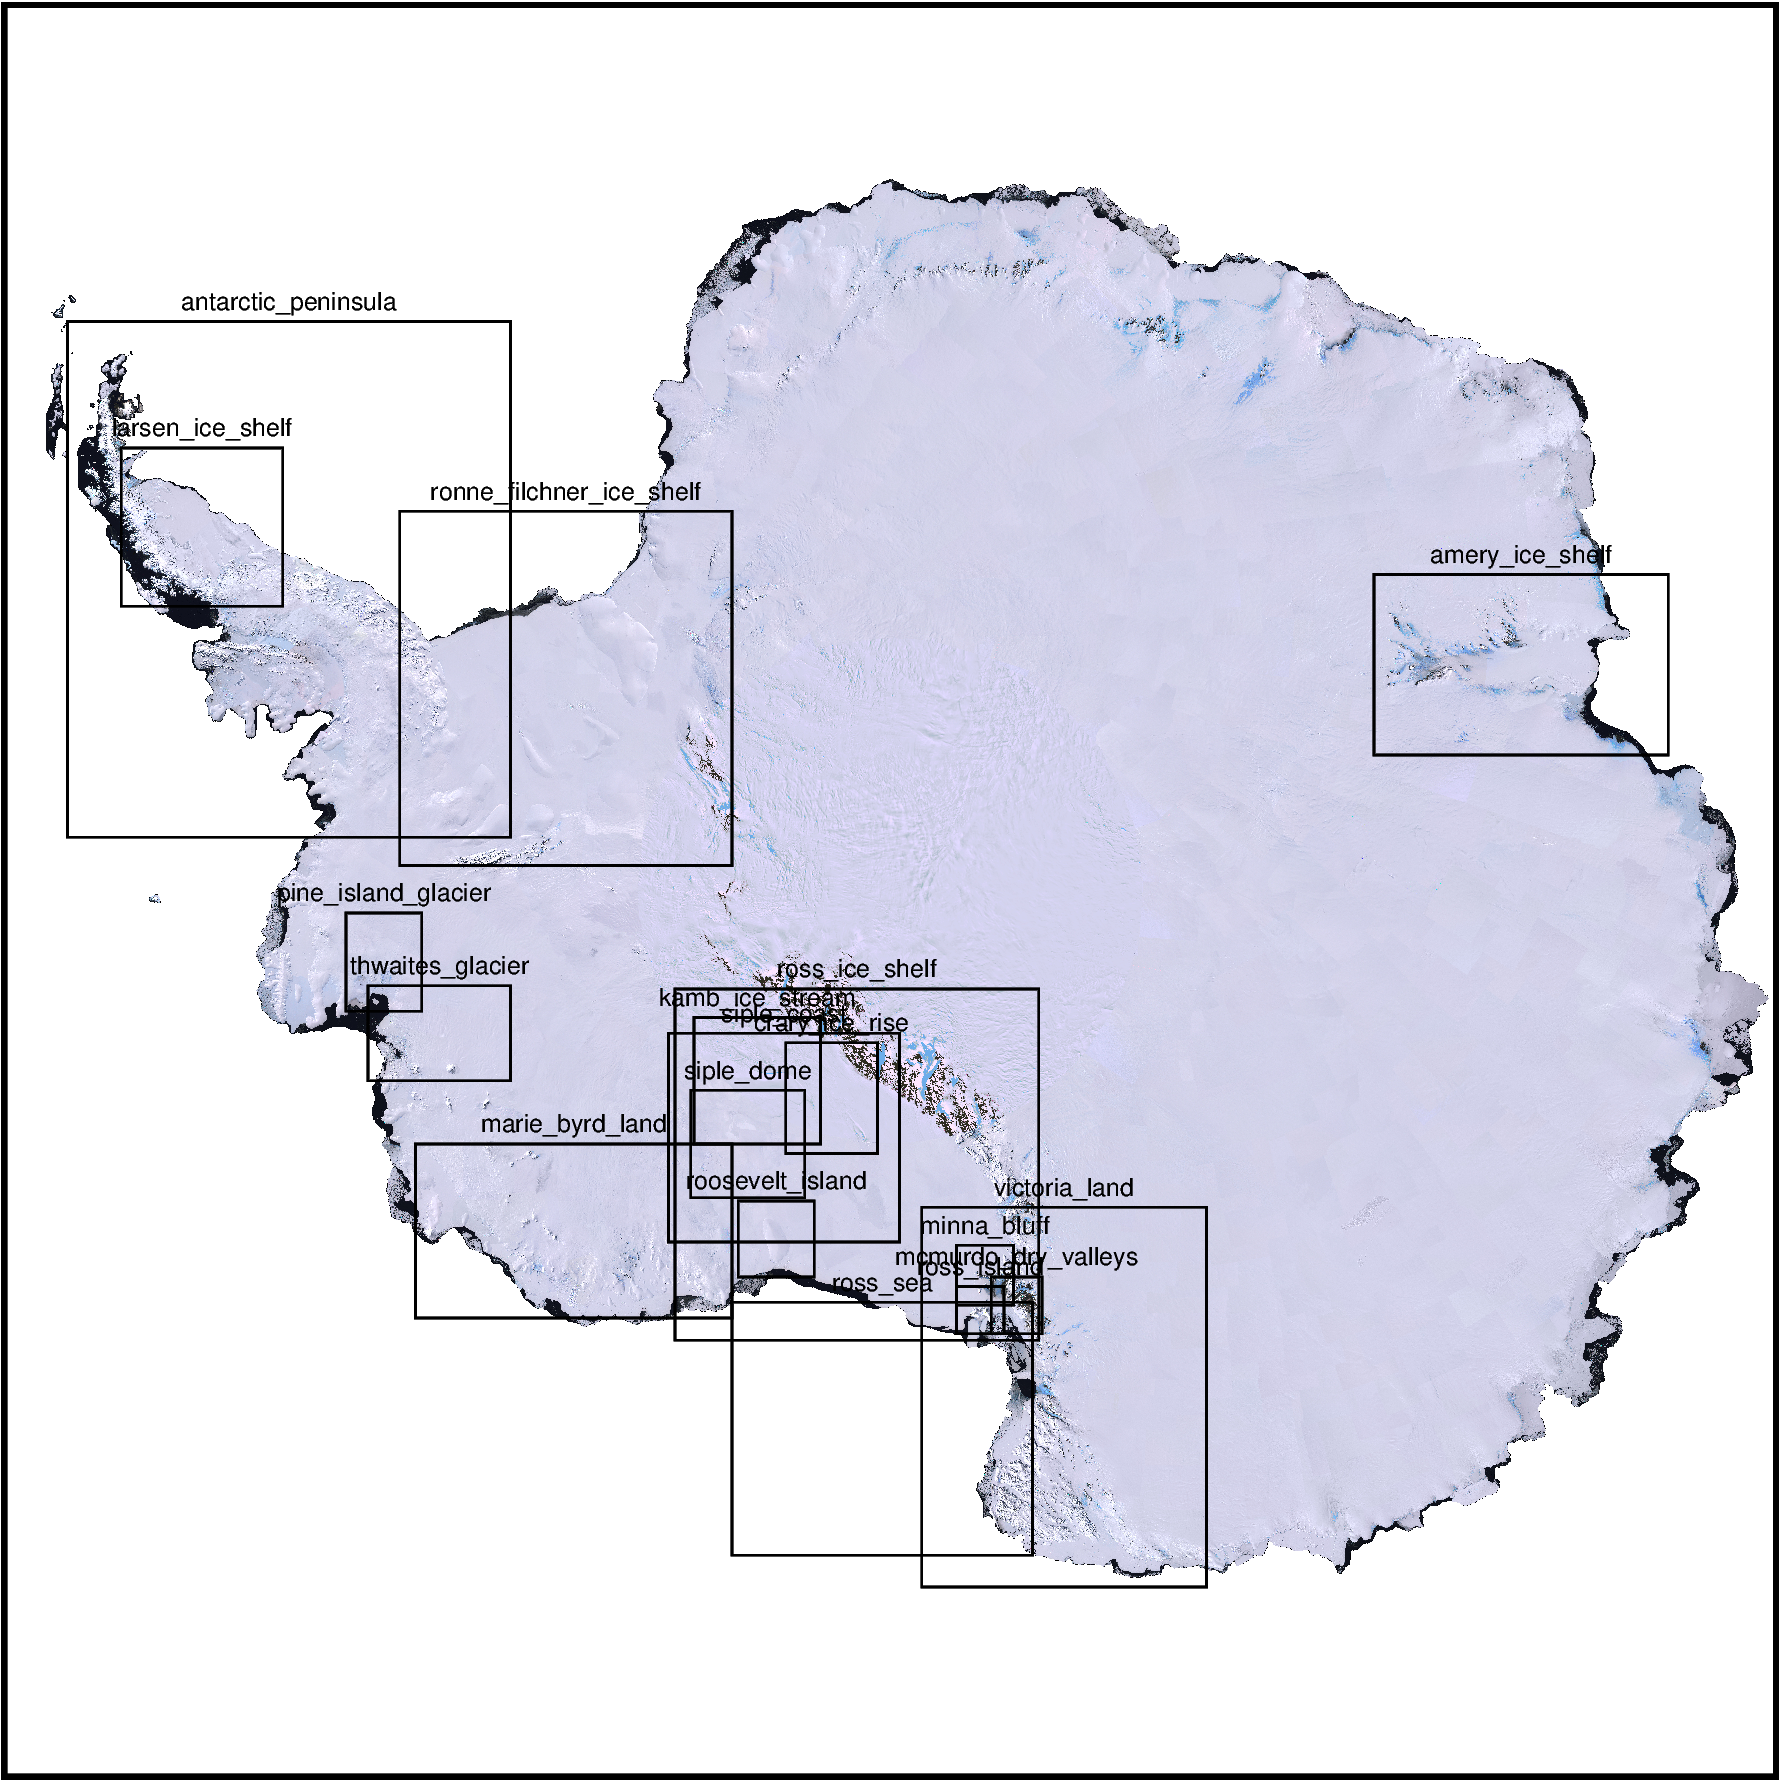

In [4]:
fig = maps.plot_grd(
    grid=fetch.imagery(),
    image=True,
    plot_region=regions.antarctica,
)

for k, v in region_dict.items():
    maps.add_box(fig, v, pen=".6p,black")
    fig.text(
        x=mean([v[1], v[0]]),
        y=v[3],
        text=k,
        justify="CB",
        offset="0/.1",
        no_clip=True,
        font="6p,Helvetica,black",
    )

# save figure to use in the docs
fig.savefig('outputs/regions_plot.png')

fig.show()

## Combining regions